In [1]:
!nvidia-smi

Thu Jun 12 05:00:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import tensorflow as tf
import numpy as np
import cv2
import os



In [3]:
img = image.load_img('/content/drive/MyDrive/12-CNN practice/Training/Happy/7.jpeg')

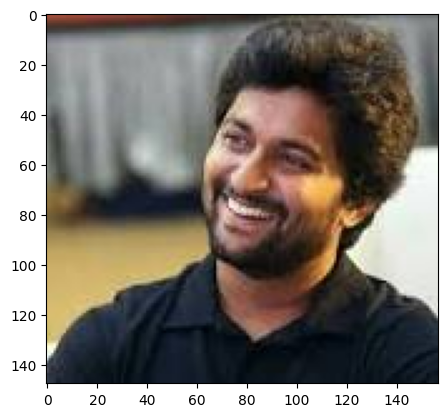

In [4]:
plt.imshow(img)

array([[[ 66,  83, 169],
        [ 66,  83, 169],
        [ 66,  83, 169],
        ...,
        [103, 102,  98],
        [105, 104, 100],
        [106, 105, 101]],

       [[ 60,  77, 156],
        [ 60,  78, 155],
        [ 60,  77, 156],
        ...,
        [116, 115, 111],
        [117, 116, 112],
        [118, 117, 113]],

       [[ 54,  70, 136],
        [ 54,  71, 134],
        [ 53,  69, 135],
        ...,
        [129, 128, 124],
        [130, 129, 125],
        [130, 129, 125]],

       ...,

       [[ 76,  63,  55],
        [ 65,  52,  44],
        [ 65,  52,  44],
        ...,
        [ 36,  27,  18],
        [ 35,  26,  17],
        [ 36,  27,  18]],

       [[ 77,  64,  56],
        [ 68,  55,  47],
        [ 67,  54,  46],
        ...,
        [ 38,  29,  20],
        [ 37,  28,  19],
        [ 38,  29,  20]],

       [[ 75,  62,  54],
        [ 68,  55,  47],
        [ 68,  55,  47],
        ...,
        [ 41,  32,  23],
        [ 36,  27,  18],
        [ 33,  24,  15]]], dtype=uint8)
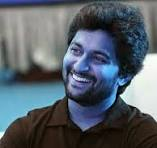

In [5]:
i1=cv2.imread(r'/content/drive/MyDrive/12-CNN practice/Training/Happy/7.jpeg')
i1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [6]:
i1.shape

(148, 157, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [8]:
t = train.flow_from_directory(directory='/content/drive/MyDrive/12-CNN practice/Training',
                              target_size=(200,200),
                              batch_size=3,
                              class_mode='binary')
v = validation.flow_from_directory(directory='/content/drive/MyDrive/12-CNN practice/Validation',
                                   target_size=(200,200),
                                   batch_size=3,
                                   class_mode='binary')

Found 40 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [10]:
t.class_indices
#train_dataset.class_indices

{'Happy': 0, 'Sad': 1}

In [11]:
#train_dataset.classes
# Access the classes from the training dataset variable 't'
t.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics = ['accuracy']
              )

In [17]:
#model_fit = model.fit(t,
 #                    steps_per_epoch = 3,
  #                   epochs = 10,
   #                  validation_data = v)

In [16]:
model.fit = model.fit(t,epochs = 15)

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 946ms/step - accuracy: 0.5011 - loss: 2.0025
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5258 - loss: 0.6931
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8309 - loss: 0.6097
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7608 - loss: 0.5980
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8048 - loss: 0.5666
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9328 - loss: 0.2945
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9131 - loss: 0.1697
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8074 - loss: 1.1609
Epoch 9/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0496
Epoch 10/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0170
Epoch 11/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 12/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accurac

In [21]:
dir_path = '/content/drive/MyDrive/12-CNN practice/Training'
for i in os.listdir(dir_path):
  print(i)

.DS_Store
Sad
Happy


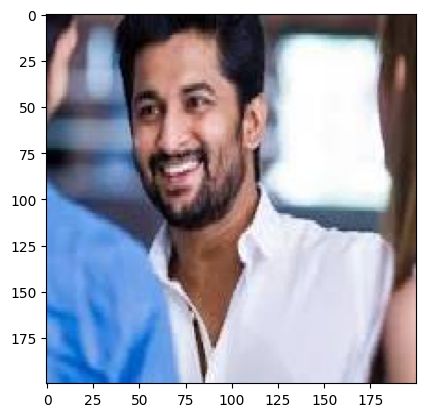

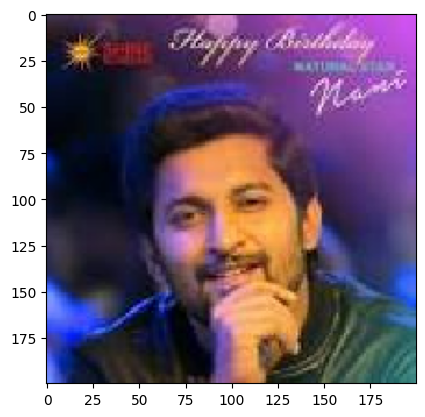

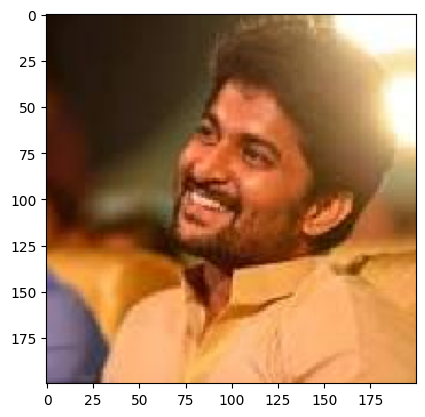

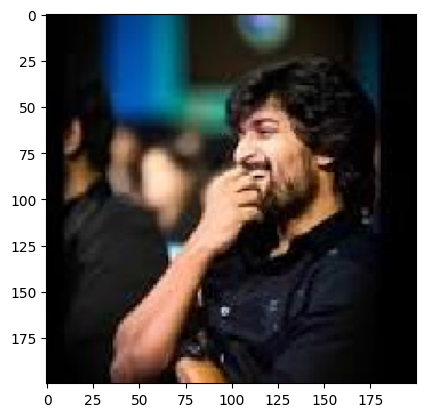

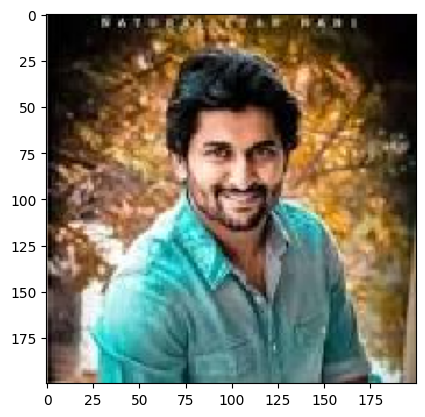

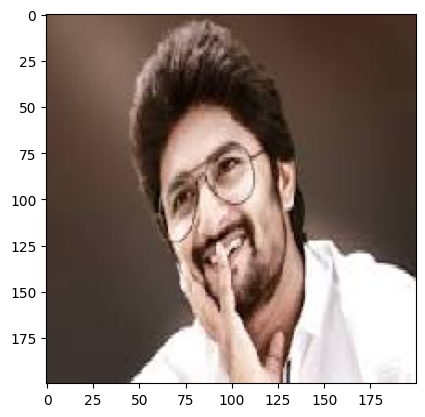

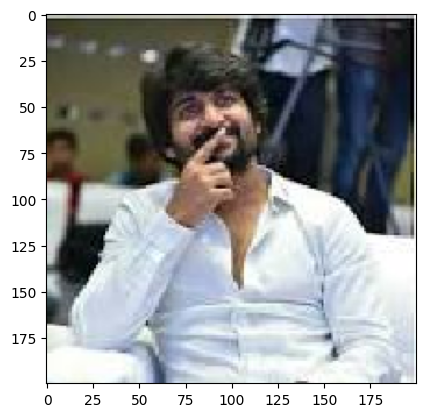

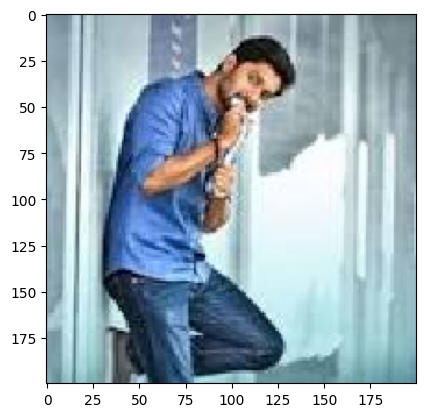

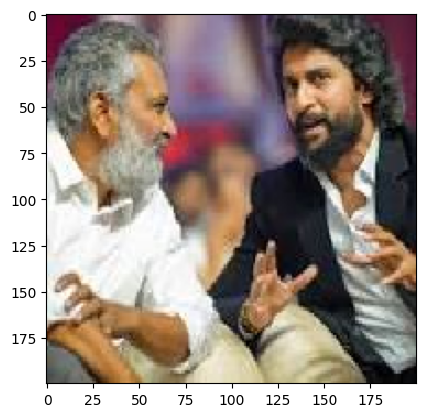

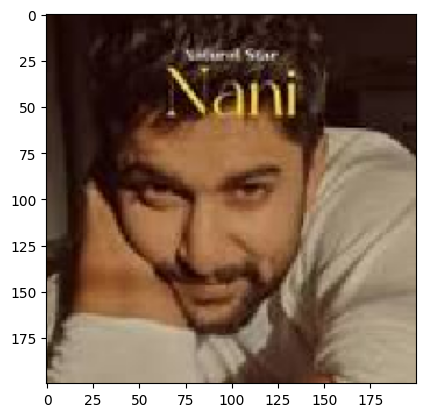

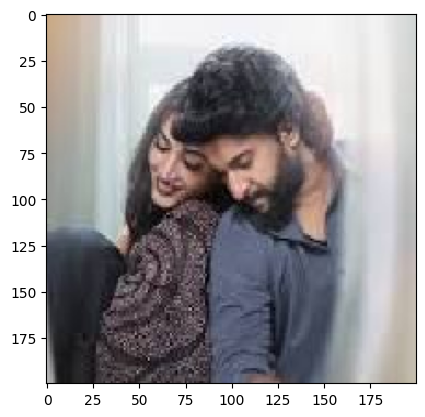

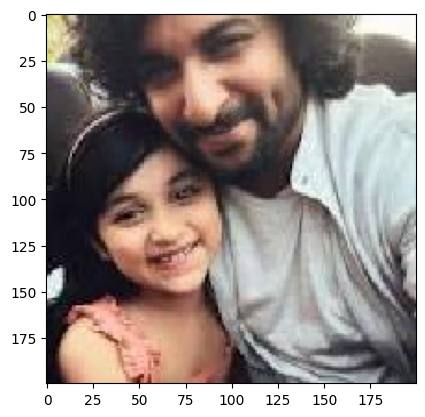

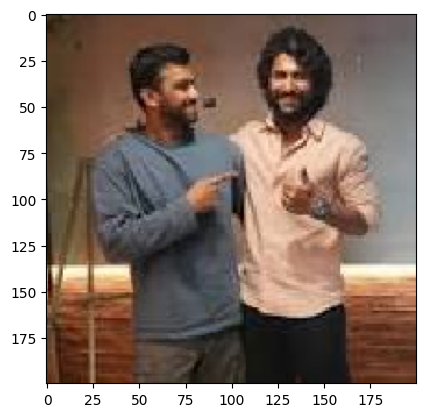

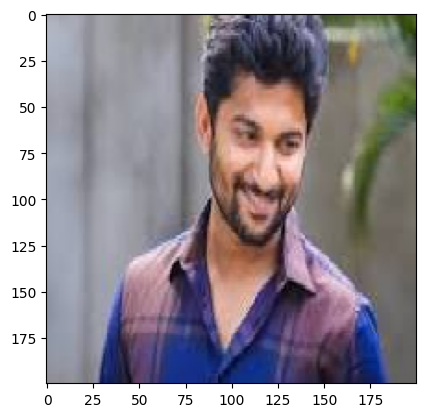

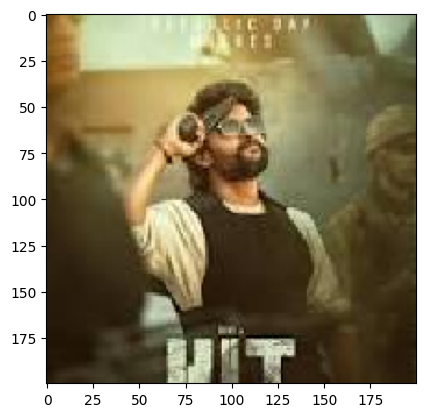

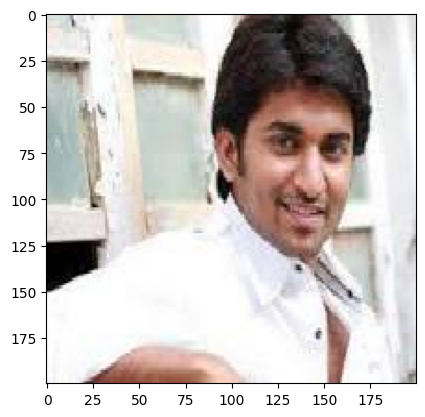

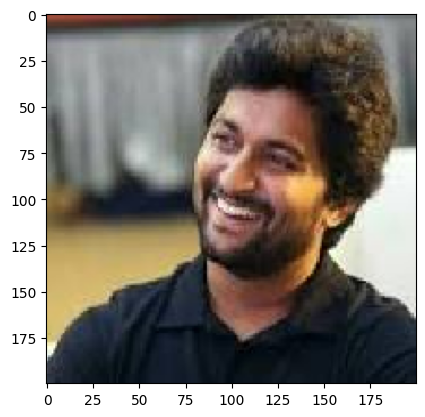

In [35]:
#dir_path = '/content/drive/MyDrive/12-CNN practice/Training/Happy'
#for i in os.listdir(dir_path ):
 #   img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
  #  plt.imshow(img)
   # plt.show()


dir_path = '/content/drive/MyDrive/12-CNN practice/Training/Happy'
for i in os.listdir(dir_path ):
    # Construct the full path to the item
    full_path = os.path.join(dir_path, i)
    # Check if the item is a file before attempting to load the image
    if os.path.isfile(full_path):
        img = image.load_img(full_path, target_size = (200,200))
        plt.imshow(img)
        plt.show()

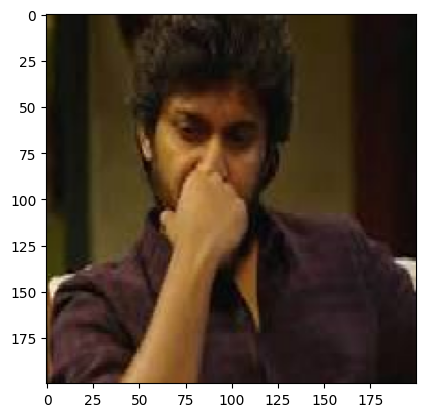

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
i am not happy


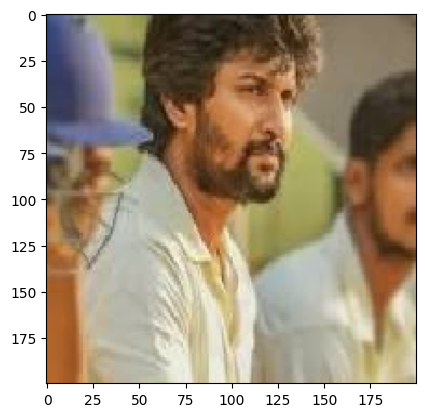

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
i am not happy


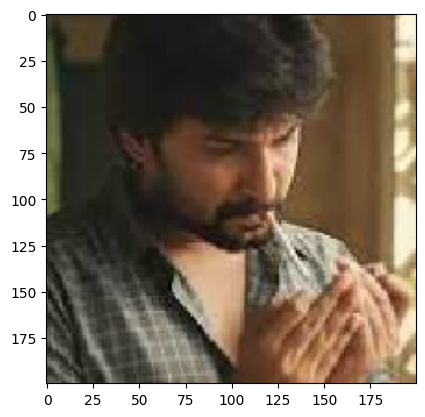

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
i am not happy


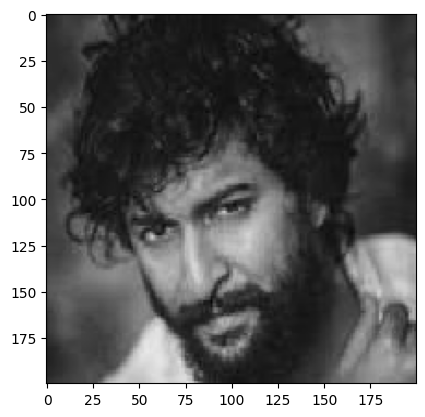

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
i am not happy


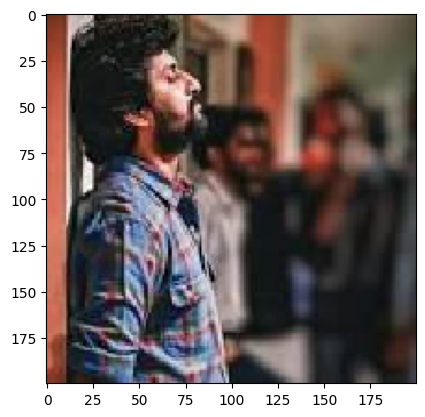

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
i am not happy


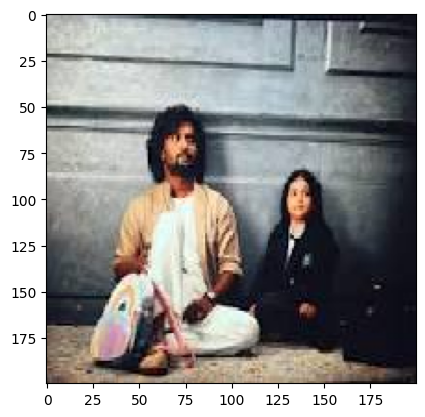

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
i am not happy


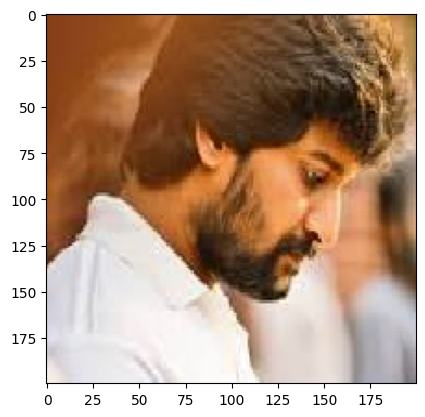

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
i am not happy


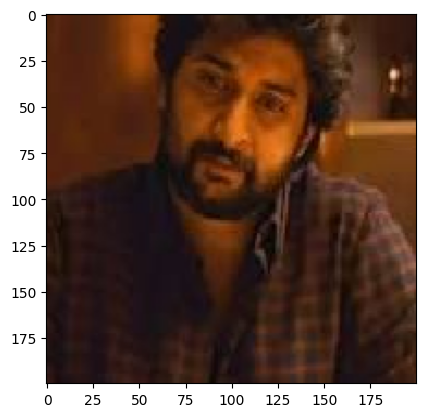

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
i am not happy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
i am not happy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
i am not happy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
i am not happy


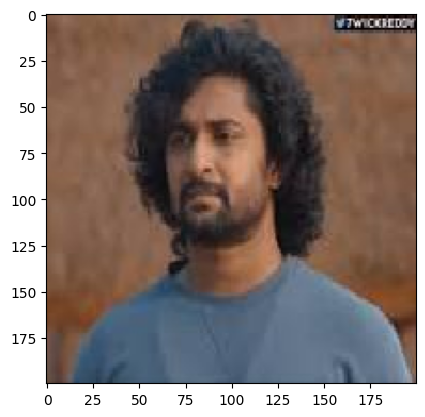

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
i am not happy


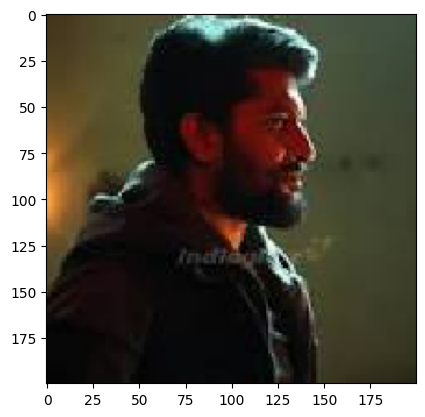

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
i am not happy


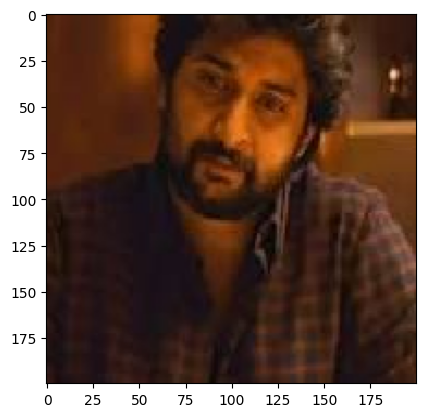

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
i am not happy


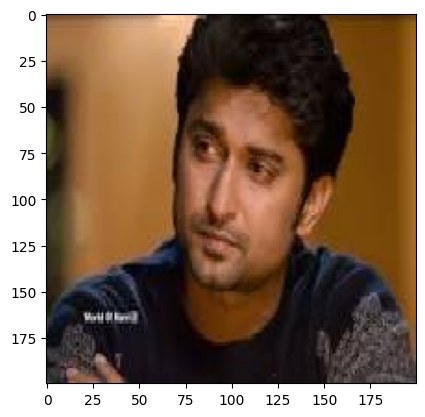

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
i am not happy


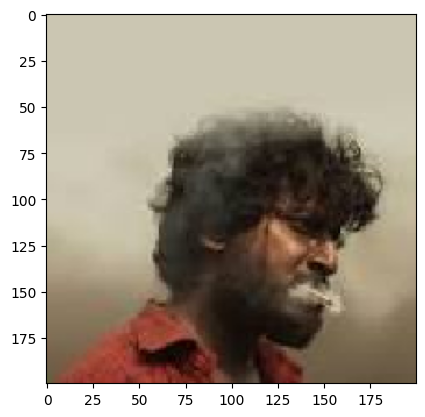

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
i am not happy


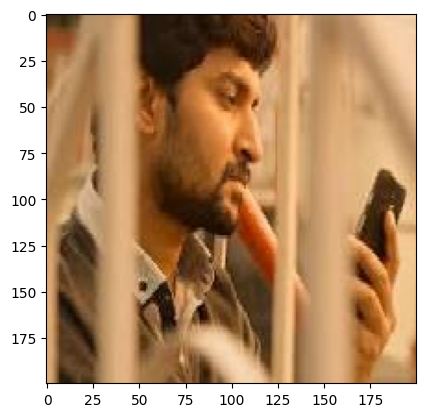

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am not happy


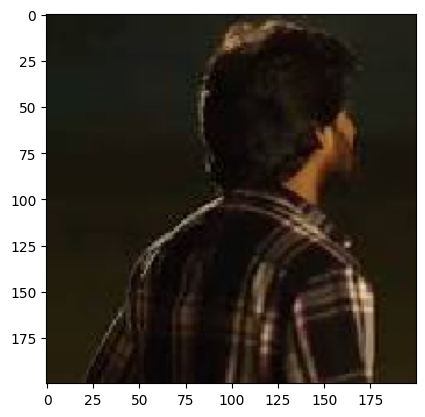

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
i am not happy


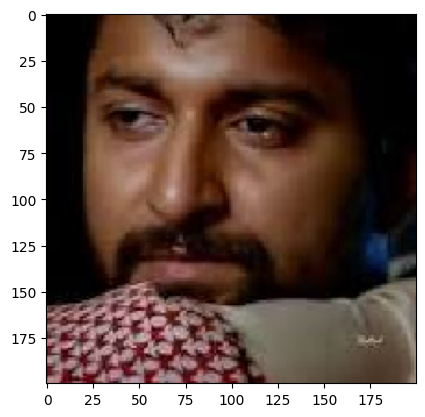

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
i am not happy


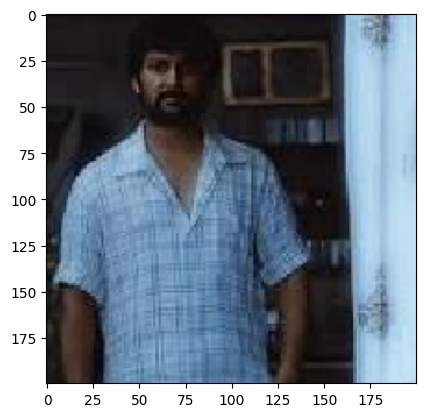

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
i am not happy


In [33]:
dir_path = '/content/drive/MyDrive/12-CNN practice/Training/Sad'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( 'i am happy')
    else:
        print('i am not happy')